# Исследование объявлений о продаже квартир

**Цель исследования** - провести исследовательский анализ данных, который поможет установить параметры, влияющие на цену объектов.

Для чего? Для того, чтобы построить автоматизированную систему, которая способна отследить аномалии и мошенническую деятельность. 

**План исследования**
1. Изучить данные 
2. Предобработка данных 
3. Анализ данных и ответы на поставленые вопросы
4. Сделать общий вывод исследования

   Согласно документации к данным:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

## Изучение данных.

### Импорт библиотек.

In [1]:
import os

import pandas as pd # импорт билбиотеки пандас
import matplotlib.pyplot as plt # импорт библиотеки матплотлиб для построения графиков
import seaborn as sns # импорт библиотеки seaborn

### Функции.

In [2]:
def countplot(data, x, title):
    
    '''
    Функция строит график (countplot) и 
    принимает на вход: датаферйм, столбец, по
    которому строится график и название графика
    '''
    
    sns.countplot(x=x, data=data)
    plt.grid()
    plt.title(title)

In [3]:
def ceiling_division(ceiling):
    
    '''
    Функция делает из натуральных чисел
    действительные. P.S. Пользователи скорее всего
    забывали ставить . между цифрами и присали (25 вместо 2.5)
    '''
    
    if ceiling > 20:
        return ceiling / 10
    elif ceiling < 20:
        return ceiling

In [4]:
def histplot(data, bins, title):
    
    '''
    Функция строит график для непрерывных величин
    и принимает на вход столбец, количество разбиение и 
    название графика
    '''
    
    sns.histplot(data, kde=True, bins=bins)
    plt.grid()
    plt.title(title)

### Загрузка данных.

Прочитаем файл `real_estate_data.csv` и сохраним его в переменной `data`

In [5]:
pth = r"C:\Users\stepa\Downloads\real_estate_data.csv"

In [6]:
if os.path.exists(pth):
    data = pd.read_csv(pth, sep='\t')
else:
    print('Ошибка')

Получение первых 10 строк таблицы

In [7]:
data.head(10) # получение первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Общая информация о данных таблицы `data`

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных - `bool`(2), `float`(14), `int`(3), `object`(3). 
Название столбцов соотвествует стилю, кроме столбцов `cityCenters_nearest`, `ponds_around3000` и `parks_around3000`.

Количестов значений в столбцах разное, а значит в них есть пропущенные значения.

Построим гистограму для всех числовых значений `data`, используя метод `plot` с параметром `figsize`.

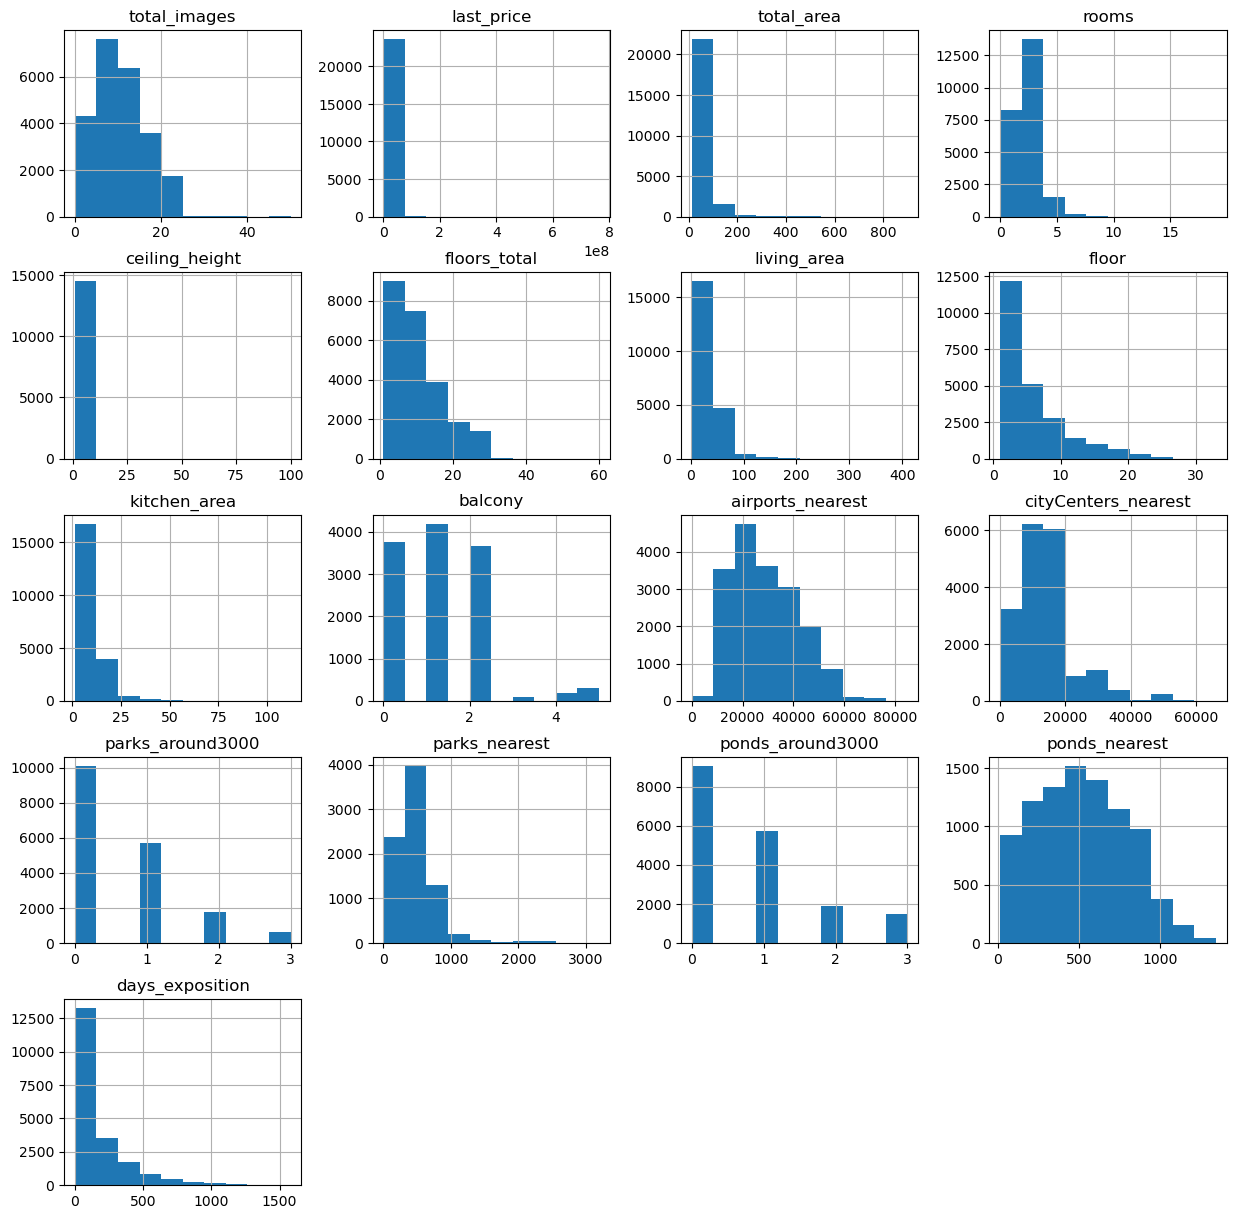

In [9]:
data.hist(figsize=(15, 15));

### Вывод
        
Каждая строка таблицы содержит информацию о разной недвижимости, которая находится в Санкт-Петербурге и его окрестностях. Есть несколько проблем такие, как:
1. Некачественное название столбцов: `parks_around3000`, `ponds_around3000` и `cityCenters_nearest`.
2. Пропуски в данных, столбцы в которых есть возмоность заполнить пропуски: `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition`, `ceiling_height` и `is_apartment`.
3. Неправильные тип данных у некоторых столбцов: `is_apartment`, `last_price`, `balcone`, `days_exposition` и `first_day_exposition`.

Также стоит проверить столбец `locality_name` на неявные дубликаты, так как название населённых пунктов могли написать по-разному.
        
Также необходимо проверить датафрейм на наличие явных дубликатов. Вдруг случайно произошло дублирование некоторых строк из-за каких-нибудь технических ошибок.
        
Для лучшего анализа данных необходимо добавить несколько новых столбцов: `price_one_meter`, `day`, `month`, `year`, `floor_apartment` и `city_centers_nearest_km`
        
Необходимо проверить на аномалии такие столбцы как: `living_area`, `total_area`, `kitchen_area`, `last_price`, `rooms`, `ceiling_height`, `floors_total`, `cityCenters_nearest`, `parks_nearest` и `floor_apartment`.

## Предобработка данных

### Переименование столбцов.

Переименуем столбцы `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` для того, чтобы они соотвествовал стилю.

In [10]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'}) # переимнование столбцов

In [11]:
data.columns # проверка результатов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Работа с пропусками.

Выведим количество пропущенных значений для каждого столбца.

In [12]:
data.isna().sum().sort_values(ascending=False) # подсчёт пропусков

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

В 14 столбцах есть пропущенные значения.
В трёх столбцах:
- `balcony`
- `parks_around_3000`
- `ponds_around_3000`

пропуски можно заполнить `0`, так как логично предположить, что пользователь не указал значение, потому что балконов в квартире нет, а водоемы и парки в радиусе 3км отсутствуют. 

В столбце `is_apartment` присутсвуют значения `Nan` и `False`, предположим, что `Nan` можно заменить на `False`, то есть не является апартаментами. Также стоит обратить вниманием, что этот столбец имеет тип - `object`, хотя должен быть типом `bool`.

Предположим, что в столбце `days_exposition` пропуски из-за того, что объявление на момент попадания в архив еще не было снято с публикации или квартира еще не продана. Для этого найдем поcледнюю дату в столбце `first_day_exposition` и будем считать, что эта дата является моментом, когда данные попали в архив. И после этого мы будем отнимать от этой даты другие значения из этого столбца для строк, где есть пропуски в столбце `days_exposition`. И тем самым найдем нужные значения.

Столбец `ceiling_height` заполним медианым значением, так как высота потолков в среднем у всех квартир одинаковая.

В остальных столбцах пропуски заполнить не получиться, они связаны с площадью, названиями населеных пунктов и расстоянием и их заполнение может сильно повлиять на исследование.

**Вывод:**

Причины, которые привели к пропускам данных разные:
1. пользователи просто не стали заполнять определенные пункты, так как, например, у них отсутсвует балкон. 
2. пропуски связанные с высотой потолков и площадью. Образовались, скорее всего из-за отсутствия информации у пользователя по этим пунктам. 
3. пропуски могли появиться из-за невнимательности пользователя, например, название населеного пункта. 
4. Столбцы связанные с расстоянием заполнялись автоматически по картографическим данным и скорее всего имели определенную область, например, в 9 строчке таблицы `data` населеный пункт Мурино в самом посёлке аэропорта нет и, возможно, поэтому расстояние до ближайшего аэропорта не указано, хотя ближайший находиться в городе Санкт-Петербург.
5. Устаревшие картографические данные.

**Заполняем пропуски в данных**

Заполним столбец `ceiling_height` медианым значением.

In [13]:
# заполняем столбец медианным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Заменяем пропущеные значения в столбцах `balcony`, `parks_around_3000`, `ponds_around_3000` на 0

In [14]:
# перебор названий столбцов в цикле и замена пропущенных значений
columns_to_replace = ['balcony', 'parks_around_3000', 'ponds_around_3000']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

Заполним пропуски в столбце `is_apartment` и заменим их на значение `False`.

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False)

**Удаление строк с пропущенными значениями**

В столбцах `floors_total` и `locality_name` есть немного пропущеных значений 86 и 49 их можно удалить, так как их мало они не повлияют на конечное исследование.

In [16]:
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)

Проверим пропали ли пропуски в столбцах, которые мы изменяли. Пропуски должны пропасть в 6-ти столбцах:
- `balcony`
- `parks_around_3000`
- `ponds_around_3000`
- `days_exposition`
- `is_apartment`
- `ceiling_height`
- `floors_total`
- `locality_name`

In [17]:
data.isna().sum().sort_values(ascending=False) # подсчет пропусков

parks_nearest           15535
ponds_nearest           14529
airports_nearest         5524
city_centers_nearest     5501
days_exposition          3171
kitchen_area             2222
living_area              1865
ponds_around_3000           0
parks_around_3000           0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

### Изменение типов данных.

В некоторых столбцах необходимо поменять тип данных:
1. В столбце `is_apartment` надо поменять тип данных на `bool`
2. В столбцах `last_price`, `balcone`, `days_exposition` изменить на `int`, так как не может быть `2.5` балкона, а в цене не так важны копейки и для удобства сделать целым количество дней.
3. В столбце `first_day_exposition` находятся даты, поэтому необходимо привести данные к типу `datetime`

Изменим тип данных столбца `is_apartment` с `object` на `bool`.

In [18]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Изменим тип данных в столбце `first_day_exposition` с `object` на `datetime`.

In [19]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

### Заполняем пропуски в `days_exposition`.

Найдем последнюю дату в датафрейме и присвоим ее новой переменной.

In [20]:
date_max = data['first_day_exposition'].max()

Вычтем из последней даты, даты, которые находятся в столбце `first_day_exposition` и этой разностью заполним пропуски в `days_exposition`

In [21]:
data['days_exposition'] = data['days_exposition'].fillna((date_max - data['first_day_exposition']).dt.days)

### Изменение типов данных (продолжение).

Изменим тип данных в столбцах `last_price`, `balcone`, `days_exposition` и `floors_total` с `float` на `int`.

In [22]:
# перебор названий столбцов в цикле и изменения типов данных
columns_to_type = ['last_price', 'balcony', 'days_exposition', 'floors_total']
for column in columns_to_type:
    data[column] = data[column].astype('int')

Проверим перевелись ли типы данных, должно стать так `bool`(3), `float`(10), `int`(7), `object`(1), `datetime`(1)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

### Работа с неявными дубликатами.

Проверим наличие неявных дубликатов в столбце `locality_name`, так как одни и теже населеные пункты могуть быть по-разному названы.

In [24]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [25]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок Мурино'], 'Мурино', regex=True)
    .replace(['поселок городского типа Мга'], 'городской поселок Мга', regex=True)
    .replace(['поселок городского типа Павлово'], 'городской поселок Павлово', regex=True)
    .replace(['поселок Рябово'], 'поселок городского типа Рябово', regex=True)
)

### Работа с явными дубликатами.

In [26]:
data.duplicated().sum() # проверяем количество явных дубликатов

0

Явные дубликаты не наблюдаются.

### Вывод.

На данном этапе были сделаны следующие действия:

1. Переименовали столбцы:
    * `cityCenters_nearest` на `city_centers_nearest`;
    * `parks_around3000` на `parks_around_3000`;
    * `ponds_around3000` на `ponds_around_3000`.
2. Сделали проверку на пропуски и заполнили их, где это возможно:
    * Столбец `ceiling_height` заполнили медианым значением;
    * Заменили пропущеные значения в столбцах `balcony`, `parks_around_3000`, `ponds_around_3000` на 0;
    * В столбцах `floors_total` и `locality_name` удалили пропуски;
    * Столбец `days_exposition` заполнили разностью последней даты в датафрейме и первой датой объявления.
3. Изменили тип данных в столбцах:
    * `is_apartment` с `object` на `bool`;
    * `first_day_exposition` с `object` на `datetime`;
    * `last_price`, `balcone`, `days_exposition` и `floors_total` с `float` на `int`.
4. Сделали проверку на неявные дубликаты и избались от них.
5. Сделали проверку на явные дублика - **не обнаружены**.


## Добавление в таблицу новых столбцов.

Добавим в таблицу новый столбец `price_one_meter`, в котором будет храниться цена одного квадратного метра

In [27]:
price_one_meter = data['last_price'] / data['total_area']
data['price_one_meter'] = round(price_one_meter, 2)

Добавим в таблицу новый столбец `day`, в котором будет храниться день недели публикации объявления.

In [28]:
data['day'] = data['first_day_exposition'].dt.weekday # находим номер дня недели методом dt.weekday

Добавим в таблицу новый столбец `month`, в котором будет храниться месяц публикации объявления.

In [29]:
data['month'] = data['first_day_exposition'].dt.month # находим месяц методом dt.month

Добавим в таблицу новый столбец `year`, в котором будет храниться год публикации объявления.

In [30]:
data['year'] = data['first_day_exposition'].dt.year # находим год методом dt.year

Добавим в таблицу новый столбец `floor_apartment`, в котором будет храниться тип этажа квартиры (значения — «‎первый», «последний», «другой»).

In [31]:
data['floor_apartment'] = data['floor'] # создаем новый столбец 

In [32]:
data['floor_apartment'] = (
    data['floor_apartment']
    .where(data['floors_total'] == data['floor'], 'другой')
    .where(data['floors_total'] != data['floor'], 'последний')
    .where(data['floor'] != 1, 'первый')
) # определяем тип этажа

Добавим в таблицу новый столбец `city_centers_nearest_km`, в котором будет храниться расстояние до центра города в километрах 

In [33]:
city_centers_nearest_km = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km'] = round(city_centers_nearest_km, 0)

## Анализ данных и ответы на поставленые вопросы
### Изучение параметров объектов и построение гистограмм

#### Тип этажа квартиры

Для построения графиков была написана функция `countplot`, которая принимает датафрейм, название столбца и названия графика.

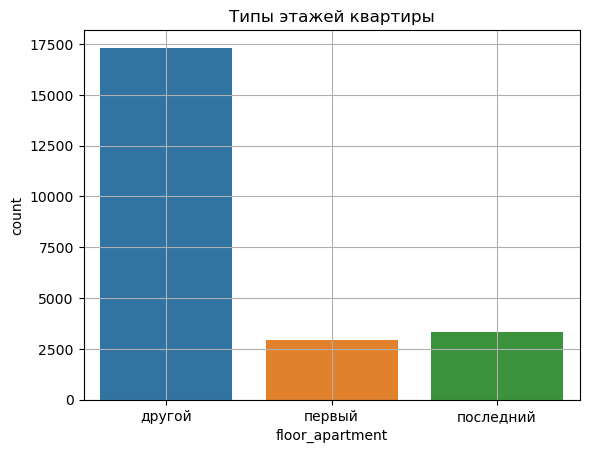

In [34]:
countplot(data, 'floor_apartment', 'Типы этажей квартиры')

Как видно из гистограммы большего всего квартир находиться на этажах между первым и последним.

Квартир расположенных на первом этаже меньше всего, но они не сильно уступают квартирам на последнем этаже.

#### Количество комнат

Построим гистограмму по количеству комнат.

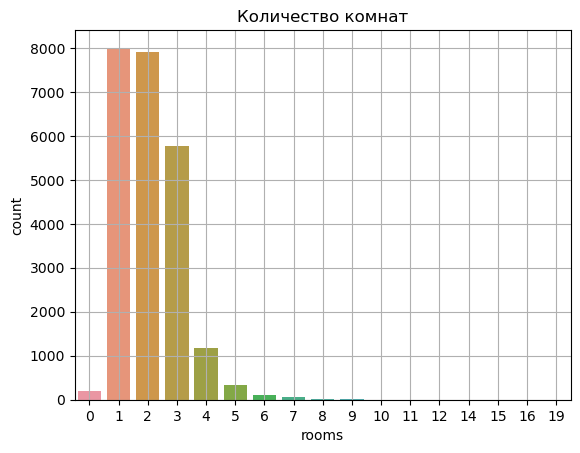

In [35]:
countplot(data, 'rooms', 'Количество комнат')

Квартиру с 19-тью комнатами представить очень сложно. Будем считать количество комнат больше 7 аномальными значениями. 

Исправить это как-то логически непредставляется возможным, поэтому удалим эти значения.

Количество комнат равно `0` скорее всего говорит о том, что это студия.

In [36]:
data = data[data['rooms'] < 8] # исключаем из столбца rooms значения больше 7

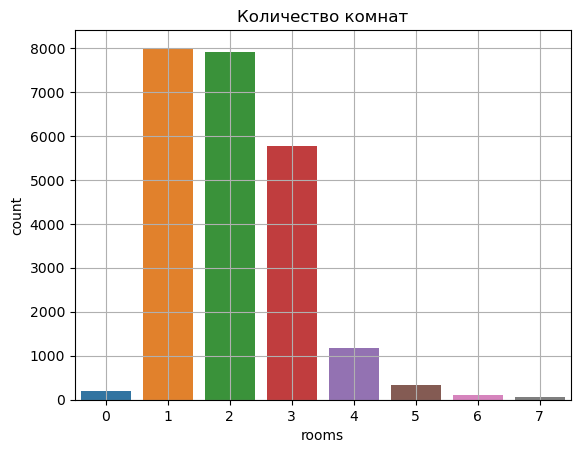

In [37]:
countplot(data, 'rooms', 'Количество комнат')

Как видно из гистограммы большинство квартир имеют 1, 2 и 3 комнаты, что логично. Квартир с более большим количеством комнат неочень много, также как и студий.

#### Общее количество этажей в доме

Построим гистограмму по общему количеству этажей в доме

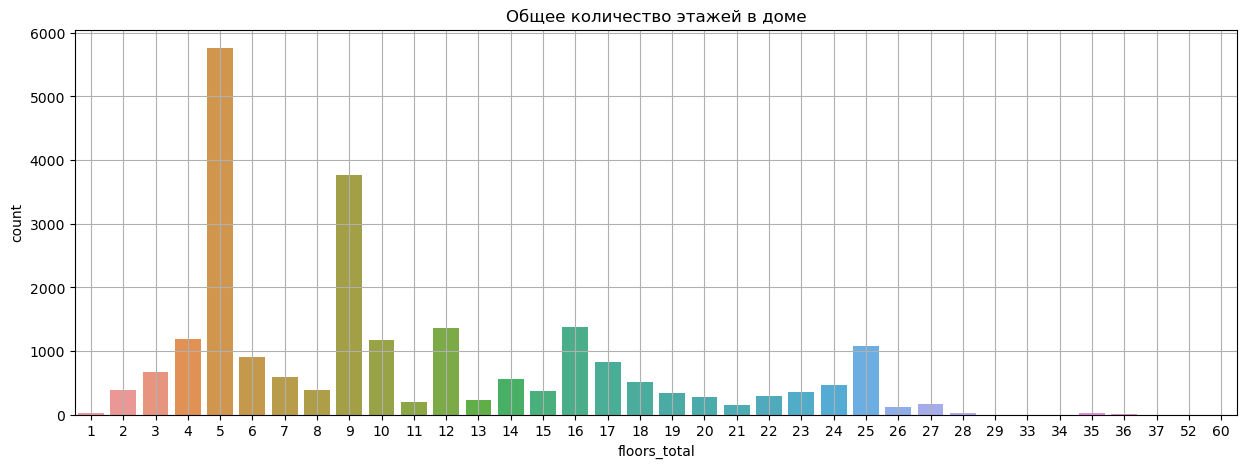

In [38]:
plt.figure(figsize=(15, 5))
countplot(data, 'floors_total', 'Общее количество этажей в доме')

Видно, что есть значения больше 30-ти

In [39]:
data['floors_total'].unique() # уникальные значения столбца floors_total

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

На первый взгляд попдаются большие значения, но впринципе такое возможно, необходимо проверить в каких населенных пунктах есть такие дома, чтобы понять аномалия это или нет.

In [40]:
anomaly_floors = data[data['floors_total'] > 30] # создаем отдельный датафрейм с количеством этажей больше 30

Теперь проверим какие населенные пункты остались

In [41]:
anomaly_floors['locality_name'].unique() # выводим уникальные значения населенных пунктов

array(['Санкт-Петербург', 'Кронштадт'], dtype=object)

Такие высокие дома для Санкт-Петербурга не будут чем-то аномальными, но вот для Кронштадта будут, поэтому удалим из датафрейма строку, которая содержит Кронштадт и количество этажей 60

In [42]:
data = data[data['floors_total'] < 60]

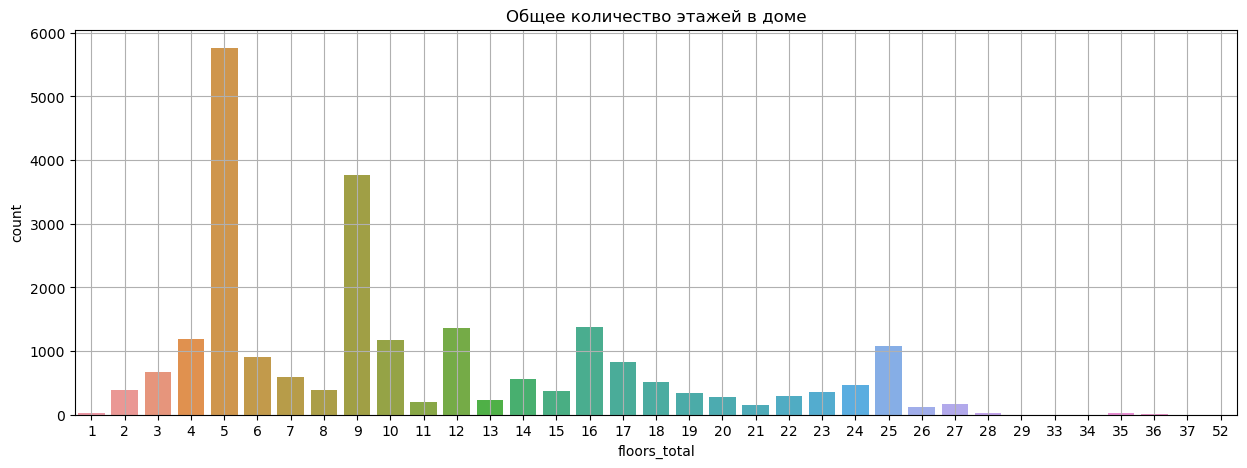

In [43]:
plt.figure(figsize=(15, 5))
countplot(data, 'floors_total', 'Общее количество этажей в доме')

Как видно по гистограмме количество этажей соотвествуют реальности даже с учетом домов с количеством этажей 50.

#### Цена объекта

Построим гистограмму по цене квартир

Text(0.5, 1.0, 'Цена объекта')

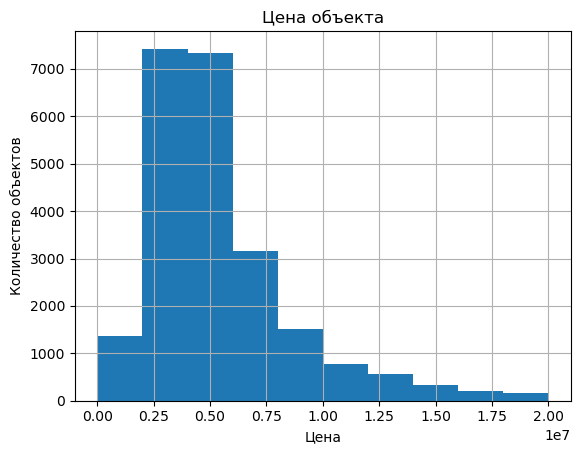

In [44]:
data['last_price'].hist(range=(0, 20000000))
plt.xlabel("Цена")
plt.ylabel("Количество объектов")
plt.title("Цена объекта")

Аномальных значений не наблюдается, хоть у нас есть квартиры, которые стоят меньше миллиона, но такие цены возможны в маленьких городах, в деревнях и послеках.

#### Высота потолков

Построим гистограмму по высоте потолков

Text(0.5, 1.0, 'Высота потолков')

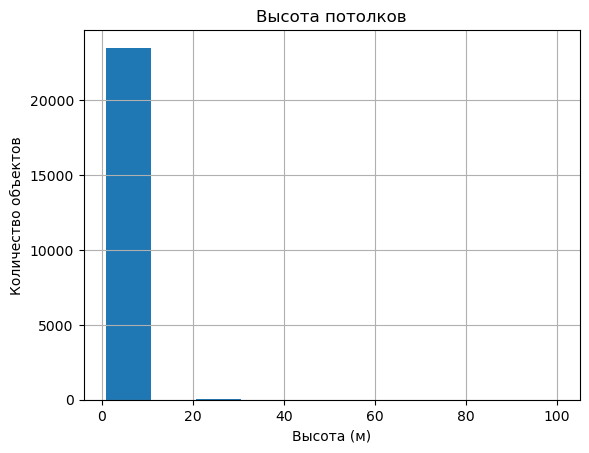

In [45]:
data['ceiling_height'].hist()
plt.xlabel("Высота (м)")
plt.ylabel("Количество объектов")
plt.title("Высота потолков")

У нас есть аномальные значения, скорее всего, пользователи забыли разделить число запятой (25 вместо 2.5) это можно изменить. Для этого была написана функция `ceiling_division`.

In [46]:
# вызываем функцию, которая приводит аномальные значения в норму
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_division)

Text(0.5, 1.0, 'Высота потолков')

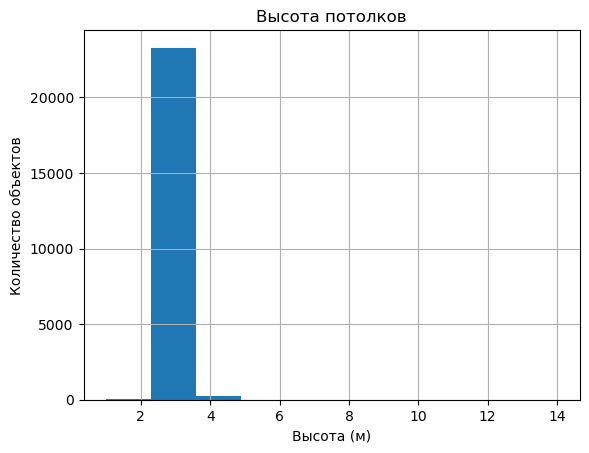

In [47]:
data['ceiling_height'].hist()
plt.xlabel("Высота (м)")
plt.ylabel("Количество объектов")
plt.title("Высота потолков")

Осталось избавиться от значений меньше 2 (таких потолков не может быть), так и от значений больше 5.

In [48]:
data = data[(data['ceiling_height'] > 2) & (data['ceiling_height'] < 5)] # оставляем потолки в диапазоне от 2 до 5 метров

Text(0.5, 1.0, 'Высота потолков')

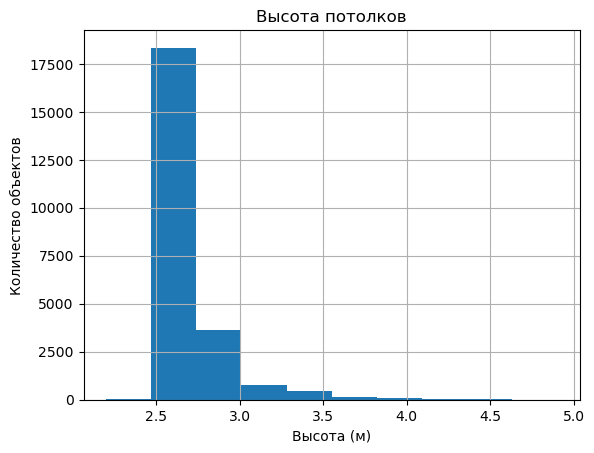

In [49]:
data['ceiling_height'].hist()
plt.xlabel("Высота (м)")
plt.ylabel("Количество объектов")
plt.title("Высота потолков")

Привели значения высоты потолков в норму

#### Расстояние до центра города в метрах

Построим гистограмму по расстоянию до центра города в метрах, для этого была написана функция `histplot`, которая принимает столбец, количество разбиение и название графика

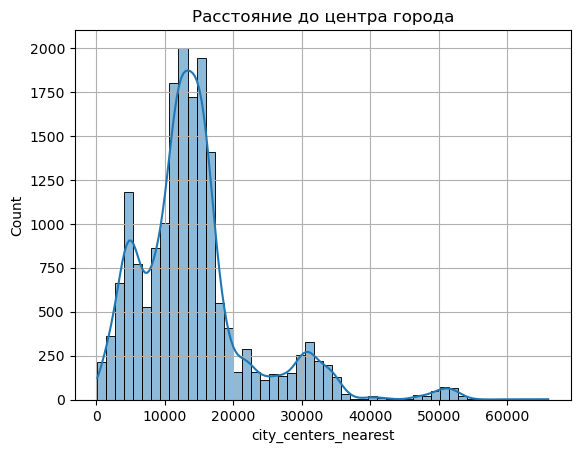

In [50]:
histplot(data['city_centers_nearest'], 50, 'Расстояние до центра города')

Посмотрим на строчки в которых расстояние до центра больше 30км

In [51]:
data[data['city_centers_nearest'] > 30000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_meter,day,month,year,floor_apartment,city_centers_nearest_km
11,9,3300000,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,NaN,0.0,NaN,7,75000.00,0,8,2018,другой,52.0
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,294.0,3.0,298.0,366,82943.93,5,7,2017,последний,33.0
14,1,4400000,36.0,2016-06-23,1,2.65,6,17.0,1,False,...,NaN,1.0,96.0,203,122222.22,3,6,2016,первый,31.0
28,8,4170000,44.0,2017-12-13,1,2.90,6,20.8,1,False,...,NaN,1.0,118.0,74,94772.73,2,12,2017,первый,31.0
33,8,4800000,73.0,2018-10-15,4,2.65,9,51.6,5,False,...,NaN,0.0,NaN,92,65753.42,0,10,2018,другой,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23526,1,2950000,53.6,2018-02-01,2,2.75,3,32.0,3,False,...,NaN,0.0,NaN,35,55037.31,3,2,2018,последний,42.0
23533,14,9990000,90.0,2017-01-23,3,3.06,17,55.0,9,False,...,NaN,1.0,545.0,86,111000.00,0,1,2017,другой,33.0
23535,8,3000000,34.1,2017-11-10,1,2.65,9,17.0,3,False,...,NaN,1.0,741.0,74,87976.54,4,11,2017,другой,30.0
23551,15,2490000,31.0,2019-01-24,1,2.50,5,17.3,5,False,...,NaN,0.0,NaN,99,80322.58,3,1,2019,последний,52.0


Как видно из проверки, что населенные пункты, у которых расстояние до центра города больше 30км являются частью более крупных городов, и такое расстояние из-за того, что эти значения взяты из картографических сервисов. Например, если взять Ломоносов, то центром в данном случае посчитали город Санкт-Петербург, что тогда получается логичным.

В результате, можно сказать, что данные значения не являются аномальными и можно оставить все без изменения.

#### Расстояние до ближайшего парка

Построим гистограмму по расстоянию до ближайшего парка

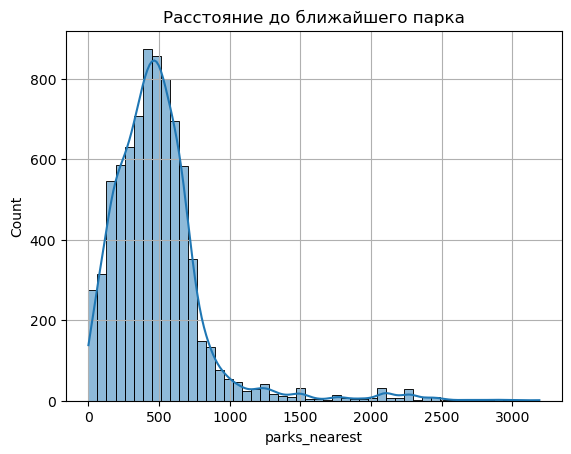

In [52]:
histplot(data['parks_nearest'], 50, 'Расстояние до ближайшего парка')

По данной гистограмме аномальных значений не наблюдается. Расстояние до парка указанно в метрах и в принципе, парк может быть, как близко к дому, так и в 3км от него, что выглядит логично.

#### Общая площадь

Построим гистограмму по общей площади

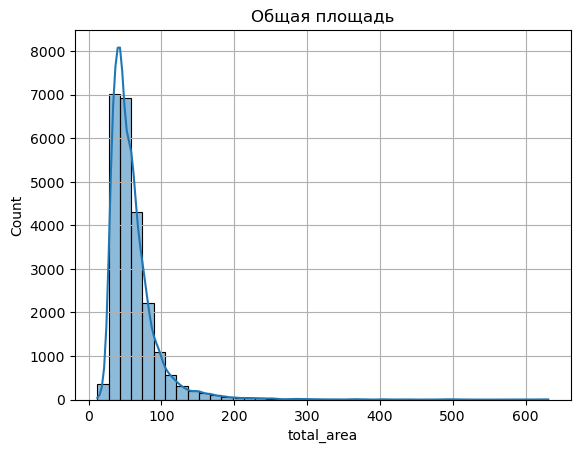

In [53]:
histplot(data['total_area'], 40, 'Общая площадь')

Есть аномальные значения, можно исключить общую площадь больше 200, а также меньше 15

In [54]:
data = data[(data['total_area'] < 200) & (data['total_area'] > 15)] # добавляем значения в диапазоне от 10 до 200

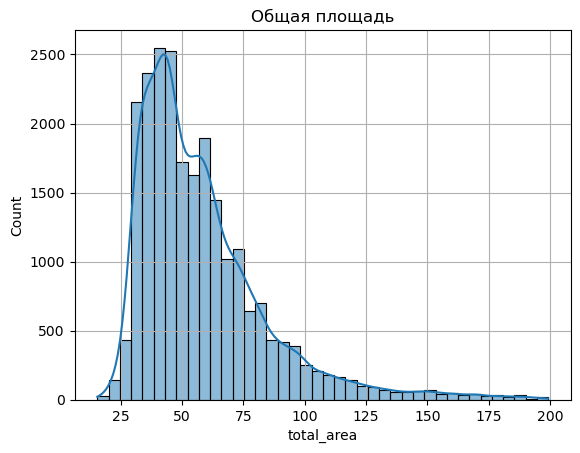

In [55]:
histplot(data['total_area'], 40, 'Общая площадь')

В результате остались значения площади от 15 до 200 квадратных метрах, что может соотвествовать действительности

#### Жилая площадь

Построим гистограмму по жилой площади

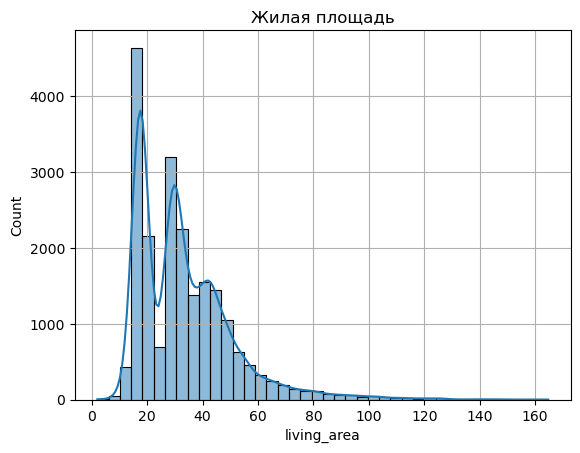

In [56]:
histplot(data['living_area'], 40, 'Жилая площадь')

Есть аномальные значения, можно исключить жилую площадь больше 120, а также меньше 10

In [57]:
data = data[(data['living_area'] < 120) & (data['living_area'] > 10)] # добавляем значения в диапазоне от 10 до 120

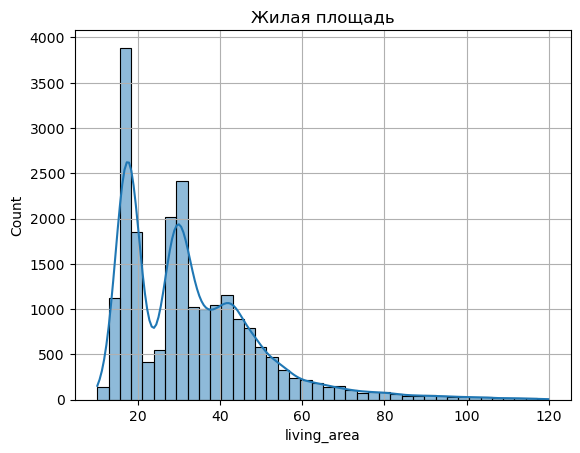

In [58]:
histplot(data['living_area'], 40, 'Жилая площадь')

В результате остались значения площади от 10 до 120 квадратных метрах, что может соотвествовать действительности

#### Площадь кухни

Построим гистограмму по площади кухни

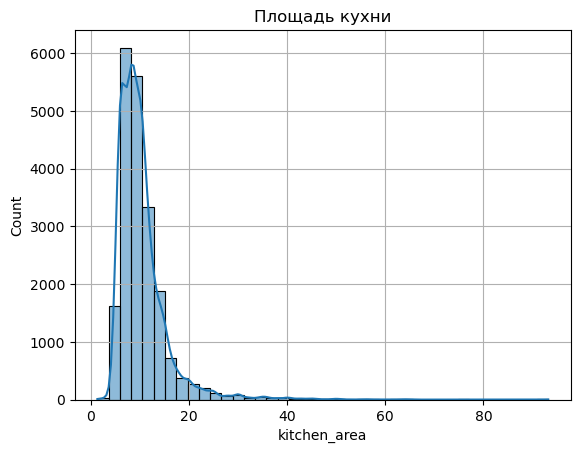

In [59]:
histplot(data['kitchen_area'], 40, 'Площадь кухни')

Есть аномальные значения, можно исключить площадь больше 40, а также меньше 10

In [60]:
data = data[(data['kitchen_area'] < 40) & (data['kitchen_area'] > 10)] # добавляем значения в диапазоне от 10 до 40

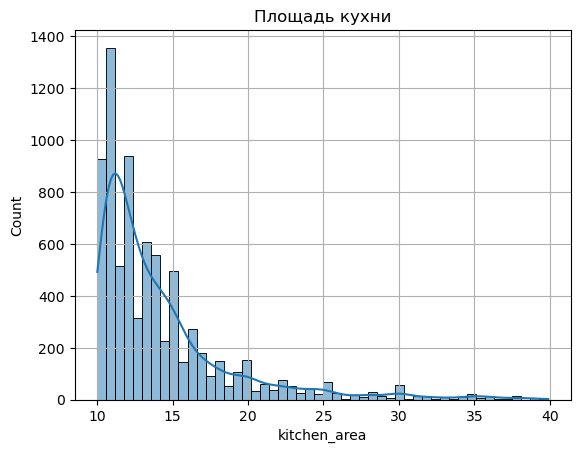

In [61]:
histplot(data['kitchen_area'], 50, 'Площадь кухни')

В результате остались значения площади от 10 до 40 квадратных метрах, что может соотвествовать действительности

### Как быстро продавались квартиры

Изучим как быстро продавались квартиры для этого возьмем столбец `days_exposition`.

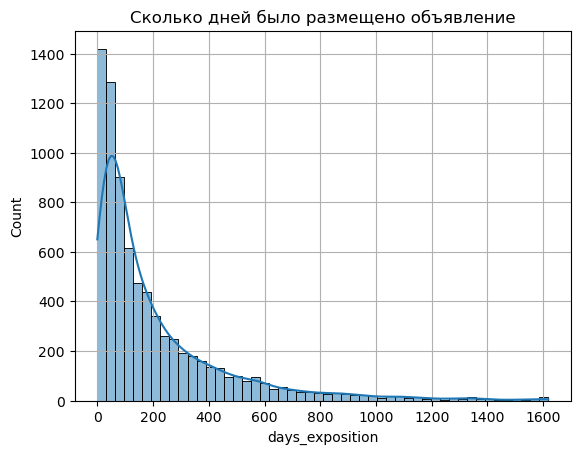

In [62]:
histplot(data['days_exposition'], 50, 'Сколько дней было размещено объявление')

Так как мы заполняли пропуски в `days_exposition` с помощью последней даты в `first_day_exposition`, то у нас есть строчки где присутсвует `0` и для лучшего анализа исключим их из датафрейма

In [63]:
data = data[data['days_exposition'] > 0]

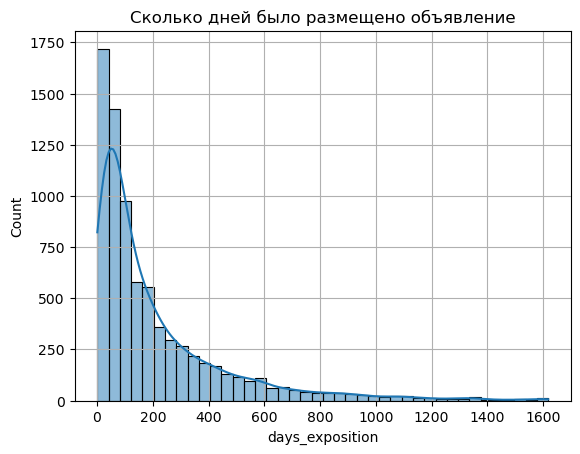

In [64]:
histplot(data['days_exposition'], 40, 'Сколько дней было размещено объявление')

Посчитаем среднее и медиану по данному столбцу

In [65]:
data['days_exposition'].mean() # считаем среднее

208.30326394243124

In [66]:
data['days_exposition'].median() # считаем медиану

112.0

Для того, чтобы определить быстрые и долгие продажи, найдем кваритили

In [67]:
data['days_exposition'].describe()

count    7782.000000
mean      208.303264
std       252.693853
min         1.000000
25%        45.000000
50%       112.000000
75%       272.000000
max      1618.000000
Name: days_exposition, dtype: float64

**Вывод**
        
В среднем продажа квартиры занимает 208 (по среднему арифметическому) и 112 дней (по медиане), исходя из квартилей необычно быстрыми продажи можно считать те, которые лежат ниже первого квартиля, то есть продаются быстрее 45 дней. Необычнайно долгими считаем продажи, лежащие правее третьего квартиля, то есть продаются дольше 272 дней.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Для того, чтобы проверить зависимость от разных факторов построим диаграммы рассеяния.

#### Зависит ли цена от общей площади?

Сначала построим диаграмму рассеяния от общей площади

Text(0.5, 1.0, 'Зависимость цены от общей площади')

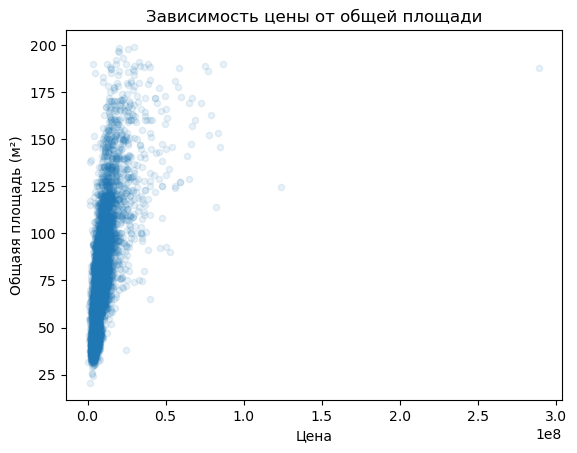

In [68]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
plt.xlabel("Цена")
plt.ylabel("Общаяя площадь (м²)")
plt.title("Зависимость цены от общей площади")

Также найдем коэффициент корреляции Пирсона, чтобы числено увидеть есть-ли линейня зависимости между двумя пременнами.

In [69]:
print(data['last_price'].corr(data['total_area']))

0.6430366748771367


**Вывод**

По диаграмме и коэффициенту корреляции можно сделать вывод, что цена имеет положителную линейную взаимосвязь, то есть зависимость есть.

#### Зависит ли цена от жилой площади

Теперь обратимся к столбцу жилой площади и выполним теже действия

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

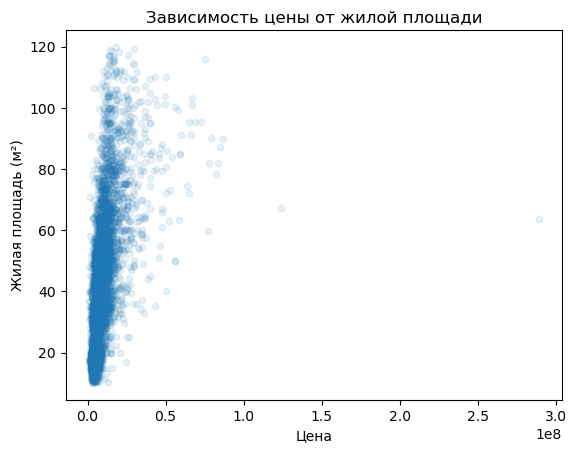

In [70]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)
plt.xlabel("Цена")
plt.ylabel("Жилая площадь (м²)")
plt.title("Зависимость цены от жилой площади")

Найдем коэффициент корреляции Пирсона

In [71]:
print(data['last_price'].corr(data['living_area']))

0.5613624822146048


**Вывод**

Хоть коэффициент корреляции стал меньше, но все также можно говорить, что зависимость между ценой и жилой площадью присутсвуют. Это также заметно на диаграмме рассеяния.

#### Зависит ли цена от площади кухни?

Дальше построим диаграмму для площади кухни

Text(0.5, 1.0, 'Зависимость цены от площади кухни')

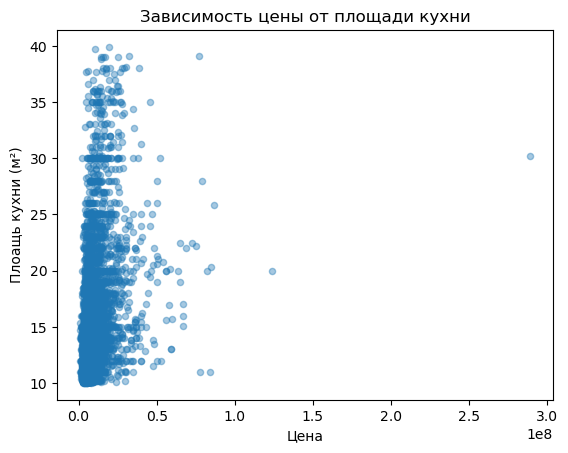

In [72]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.4)
plt.xlabel("Цена")
plt.ylabel("Плоащь кухни (м²)")
plt.title("Зависимость цены от площади кухни")

Найдем коэффициент корреляции Пирсона

In [73]:
print(data['last_price'].corr(data['kitchen_area']))

0.38084720482854084


**Вывод**

В данном случае говорить о зависимости сложнее, хоть коэффициент и больше `0`, но он составляет всего `0.38`, а следовательно зависимость довольно слабая. Так же и по диаграмме у двух предыдущих был небольшой наклон в право. Здесь же такое не наблюдается, что как раз и показывается коэффициент. Так что зависимость между ценой и площадью кухни довольно слабая.

#### Зависит ли цена от количества комнта?

Теперь проверим есть-ли зависимость цены от количества комнат.

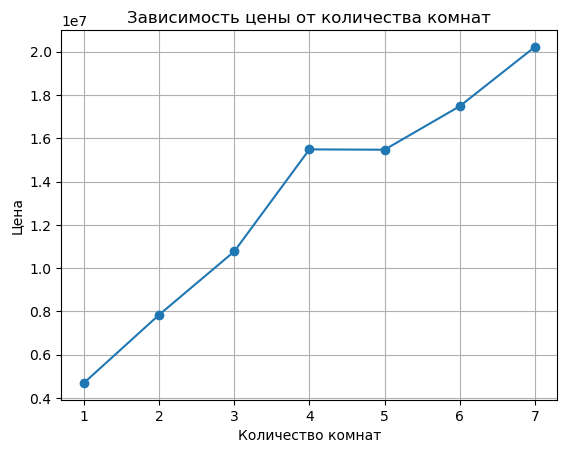

In [74]:
plt.plot(data.groupby('rooms')['last_price'].mean(), marker='o')
plt.grid()
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.title("Зависимость цены от количества комнат")
plt.show()

**Вывод**
        
По построенному графику видно, что цена зависит от количества комнат, чем больше комнта, тем больше цена недвижимости

#### Зависит ли цена от этажа, на котором расположена квартира?

Составим график по расположению квартиры, то есть в нашем случае это: первый, последний и другие.

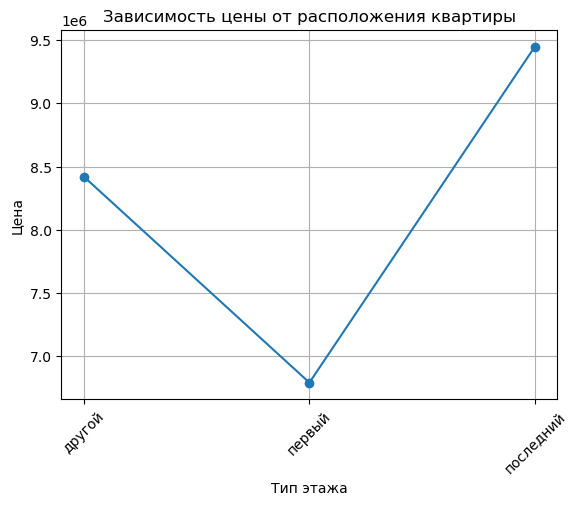

In [75]:
plt.plot(data.groupby('floor_apartment')['last_price'].mean(), marker='o')
plt.grid()
plt.xlabel("Тип этажа")
plt.ylabel("Цена")
plt.title("Зависимость цены от расположения квартиры")
plt.xticks(rotation=45)
plt.show()

**Вывод**

По диаграмме можно сказать, что цена зависит от этажа квартиры, так самые дешевые на первом, далее на последнем и на всех остальных этажах цены больше.

#### Зависит ли цена от даты размещения?

Посмотрим на зависимость цены от дня недели

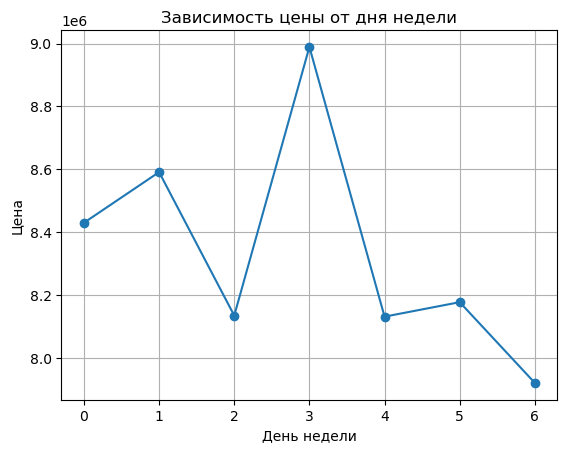

In [76]:
plt.plot(data.groupby('day')['last_price'].mean(), marker='o')
plt.grid()
plt.xlabel("День недели")
plt.ylabel("Цена")
plt.title("Зависимость цены от дня недели")
plt.show()

Найдем зависимость между ценой и месяцем

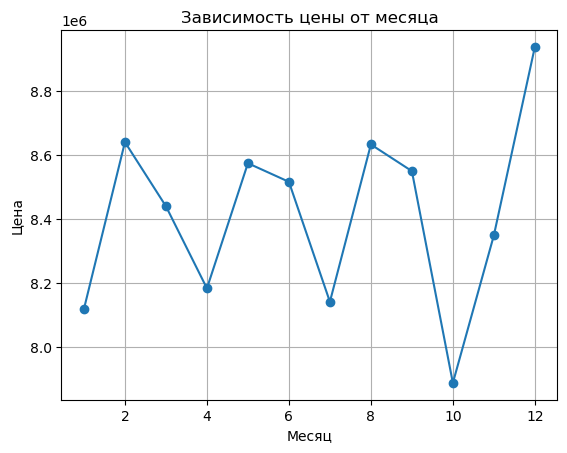

In [77]:
plt.plot(data.groupby('month')['last_price'].mean(), marker='o')
plt.grid()
plt.xlabel("Месяц")
plt.ylabel("Цена")
plt.title("Зависимость цены от месяца")
plt.show()

Найдем зависимость между ценой и годом

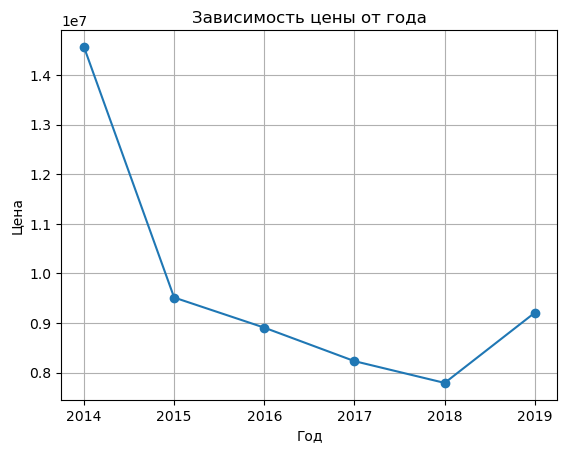

In [78]:
plt.plot(data.groupby('year')['last_price'].mean(), marker='o')
plt.grid()
plt.xlabel("Год")
plt.ylabel("Цена")
plt.title("Зависимость цены от года")
plt.show()

**Вывод** 

В результате можно сделать вывод, что цена в равной степени не зависит от дня, месяца или года, то есть от даты размещения, хотя и можно подумать, что цена зависит от года, так как с каждым годом она становилась меньше, но в 2019 году цена стала увеличиваться, и возможно продолжила увеличиваться и в следующих годах, а следовательно уверено сказать, что зависимость есть не получится. 

### Средняя цена одного квадратного метра в 10 населённых пунктах

Найдем среднюю цену одного квадратного метра в 10 пунктах с наибольшим количеством объявлений. Для этого создадим сводную таблицу по `total_area` и посчитаем среднее значение, а также количество объявлений.

In [79]:
data_locality_count = data.pivot_table(index='locality_name', values='total_area', aggfunc=['mean', 'count']) #сделаем сводную таблицу

In [80]:
data_locality_count.columns = ['mean_area', 'count_ad'] # переименуем столбцы

In [81]:
data_locality_count.sort_values(by='count_ad', ascending=False).head(10) # выведим 10 пунктов с наибольшем количеством объявлений

,mean_area,count_ad
locality_name,,
Санкт-Петербург,75.555823,5744
Мурино,51.546926,244
поселок Шушары,59.648100,221
поселок Парголово,54.394976,209
Всеволожск,63.856420,162
деревня Кудрово,57.167656,128
Пушкин,71.595702,114
Кудрово,52.236437,87
Сестрорецк,73.454815,81


**Вывод**

Выделили 10 населенных пунктов с наибольшим количеством объявлений. В результате получили, что в Санкт-Петербуге больше всего объявлений, а также самая большая цена за 1 квадратный метр. Самая маленькая цена за 1 квадратный метр в Мурино. А меньше всего объявлений средни них в деревне Новое Девяткино

###  Средняя цена каждого километра в Санкт-Петербурге

Выделим объявления только по Санкт-Петербургу

In [82]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

Сделаем сводную таблицу для расчета средней цены каждого километра от центра города

In [83]:
mean_price_km =  data_spb.pivot_table(index='city_centers_nearest_km', values='last_price')

Text(0.5, 1.0, 'Средняя цена каждого километра')

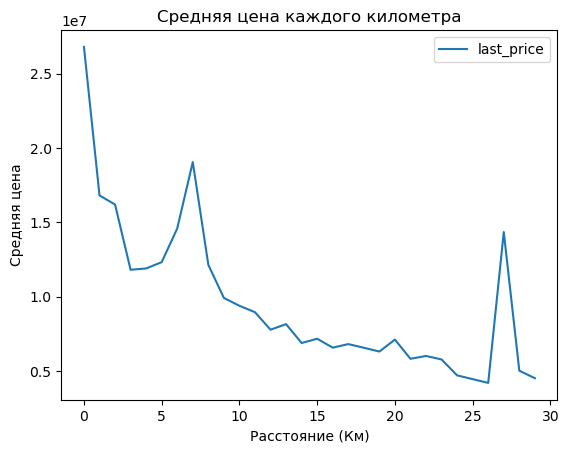

In [84]:
mean_price_km.plot() # построим график зависимости расстояния от цены каждого километра
plt.xlabel("Расстояние (Км)")
plt.ylabel("Средняя цена")
plt.title("Средняя цена каждого километра")

**Вывод**

Мы посчитали среднюю цену каждого километра до центра города Санкт-Петербугра. Можно сказать что, чем ближе объект находиться к центру города, тем дороже его стоимость, но есть несколько исключений. Возможно они связаны с самим объектом, например, большая общая площадь и поэтому, хоть он и далеко от центра, но цена будет выше, чем у среднестатистического объекта на данном километраже от центра.

## Общий вывод

Данные были получены из файла `real_estate_data.csv`. Было известно, что есть два вида данных:
- Вписаны пользователем
- Получены автоматически на основе картографических данных

Сначала сделали обзор данных. Само исследование проходило в три этапа:
1. Изучить данные
2. Предобработка данных
3. Исследовательский анализ данных

**1. Обзор данных**

В таблице  22 столбца. Тип данных - `bool`(2), `float`(14), `int`(3), `object`(3).

**Вывод**

Столкнулись с проблемой склеивания данных в одну строку. Количество значений в 14 столбцах различается. Значит, в данных есть пропущенные значения. Название столбцов соотвествует стилю, кроме столбцов: `cityCenters_nearest`, `parks_around3000` и `ponds_around3000`.

**2. Предобработка данных**

- Переименовали столбец `cityCenters_nearest` в `city_centers_nearest`.
- Переименовали столбец `parks_around3000` в `parks_around_3000`.
- Переименовали столбец `ponds_around3000` в `ponds_around_3000`.

В 14 столбцах есть пропущенные значения:

- В трёх столбцах: `balcony`, `parks_around_3000`, `ponds_around_3000` пропуски заполнили `0`.
- В столбце `is_apartment` заполнили пропуски булевым значением `False`.
- Столбец `ceiling_height` заполним медианым значением потолков.
- В столбцах `floors_total` и `locality_name` удалили пропущенные значения, так как количество пропусков мало.
- В столбце `days_exposition` заполним пропуски ввиде разницы последней даты в датафрейме в столбце `first_day_exposition` и даты в этом же столбце для строк, где есть пропуски в `days_exposition`.
- В остальных столбцах пропуски заполнить не получилось.

Далее стали менять в столбцах тип данных, где это было необходимо:

- В столбце `is_apartment` сделали тип данных `bool`.
- В столбцах `last_price`, `balcone`, `days_exposition` сделали `int`.
- Столбец `first_day_exposition` привели данные к типу `datetime`.

Следом работали с неявными дубликатами в столбце `locality_name`:

- Заменили `поселок Мурино` на `Мурино`
- Заменили `поселок городского типа Мга` на `городской поселок Мга`.
- Заменили `поселок городского типа Павлово` на `городской поселок Павлово`.
- Заменили `поселок Рябово` на `поселок городского типа Рябово`.

Далее сделали проверку на явные дубликаты и они не были обнаружены.

Для в исследование понадобилось добавить в датафрейм несколько новых столбцов:

- Столбец `price_one_meter`, в котором будет храниться цена одного квадратного метра.
- Столбец `day`, в котором будет храниться день недели публикации объявления.
- Столбец `month`, в котором будет храниться месяц публикации объявления.
- Столбец `year`, в котором будет храниться год публикации объявления.
- Столбец `floor_apartment`, в котором будет храниться тип этажа квартиры (значения — «первый», «последний», «другой»).
- Столбец `city_centers_nearest_km`, в котором будет храниться расстояние до центра города в километрах.

**3. Исследовательский анализ данных**

1. Необходимо было изучить данные и выявить аномальные значения: 
    - общая площадь;
    - жилая площадь;
    - площадь кухни;
    - цена объекта;
    - количество комнат;
    - высота потолков;
    - тип этажа квартиры («первый», «последний», «другой»);
    - общее количество этажей в доме;
    - расстояние до центра города в метрах;
    - расстояние до ближайшего парка

   **Вывод**
    - В столбце по типу этажу квартиры не было найдено аномалий и большинство квартир находиться в значении "другой", а меньше "первый".
    - В столбце по количеству комнта были найдены аномалии. Исключили квартиры больше `7` комнат.
    - В столбце по количеству этажей в доме было найдено аномальное значение в виде `60`-ти этажного дома в Кронштадте.
    - В столбце по цене объекту аномальных значений не было найдено.
    - В столбце по высоте потолков есть аномальные значения их возможно исправить (`25` вместо `2.5`), а также исключили потолоки меньше `2` и больше `5` метров.
    - В столбце по расстоянию до центра города сделали следующий вывод, что населенные пункты, у которых расстояние до центра города больше `30`км являются частью более крупных городов, и такое расстояние из-за того, что эти значения взяты из картографических сервисов.
    - В столбце расстояние до ближайшего парка аномалий не обнаружено
    - В столбце по общей площади исключили значения больше `200` и меньше `15`
    - В столбце по жилой площади исключили значения больше `120` и меньше `10`
    - В столбце по площади кухни сключили значения больше `40` и меньше `10`

2. Изучили, как быстро продавались квартиры.

    В среднем продажа квартиры занимает `208` (по среднему арифметическому) и `112` дней (по медиане), исходя из квартилей необычно быстрыми продажи можно считать те, которые лежат ниже первого квартиля, то есть продаются быстрее `45` дней. Необычнайно долгими считаем продажи, лежащие правее третьего квартиля, то есть продаются дольше `272` дней.


3. Изучили какие факторы больше всего влияют на общую (полную) стоимость объекта.
    - Была найдена зависимость цены от общей площади.
    - Также можно сказать, что зависимость цены от жилой площади **есть**.
    - Зависимость между ценой и площадью кухни есть, но довольно слабая.
    - Зависимость между ценой и количеством комнат **есть**, чем больше комнат, тем больше цена.
    - Зависит-ли цена от дня, месяца или года, то есть от даты размещения, сказать точно неполучиться,так как у данной связи более сложный характер, то есть не линейный. Возможно зависимость и есть, но влияет на нее больше факторов, чем просто дата размещения.


4. Посчитайли среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

    В результате получили, что в Санкт-Петербуге больше всего объявлений `5744`, а также самая большая цена за 1 квадратный метр `75.555823`. Самая маленькая цена за 1 квадратный метр в Мурино `51.546926`. А меньше всего объявлений средни них в деревне Новое Девяткино `66`.


5. Вычислили среднюю цену каждого километра в Санкт-Петербурге.

    Чем ближе объект находиться к центру города, тем дороже его стоимость, что выглядит логичным. Есть нексолько выпадающих значений, что как говорит о том, что цена зависит от множества факторов.

**Вывод**

Рыночная стоимость объектов недвижимости зависит от таких факторов, как общая площадь, жилая площадь, количество комнта в квартире и расстояние от центра.